아래는 본 파서를 활용하기 위한 필수 라이브러리입니다.

In [1]:
#!/usr/bin/python
# coding: utf-8
import csv
import codecs
import os
import re
import sys
import glob
import pandas as pd
import numpy as np
import random

시각화 설정

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = 15, 7

from matplotlib import font_manager
font_fname = 'C:\\Windows\\Fonts\\malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family
plt.rcParams['axes.unicode_minus'] = False

## 파일병합

input_path에 기간별로 분할된 원본파일이 있는 경로를 설정하고  output_file에 원본 파일을 병합합니다.

In [3]:
input_path="C:\\Users\\hanbee\\Dropbox\\국토부 해커톤\\data\\전월세_실거래가_10년"

지정 폴더에 있는 모든 파일을 불러옵니다. '2015_*'란 2015_ 로 시작하는 모든파일을 불러오기 위한 명령어입니다.

In [4]:
all_files=glob.glob(os.path.join(input_path, '단독다가구*'))
len(all_files)

10

파일을 병합합니다.

In [5]:
all_data_frames=[]
for file in all_files:
    xls = pd.ExcelFile(file)
    data_frame = xls.parse(skiprows=16, index_col=None)
    all_data_frames.append(data_frame)
data_frame_concat=pd.concat(all_data_frames, axis=0, ignore_index=True)
data_frame_concat.head()

,시군구,번지,도로조건,계약면적(㎡),전월세구분,계약년월,계약일,보증금(만원),월세(만원),건축년도,도로명
0,서울특별시 강남구 개포동,1**,8m미만,15.0,월세,201708,21~31,"3,000",30,1988.0,선릉로14길
1,서울특별시 강남구 개포동,1**,8m미만,16.0,월세,201707,11~20,500,40,1988.0,선릉로14길
2,서울특별시 강남구 개포동,1***,12m미만,16.5,월세,201708,21~31,500,48,1991.0,논현로8길
3,서울특별시 강남구 개포동,1***,8m미만,16.8,월세,201705,11~20,500,70,1992.0,논현로8길
4,서울특별시 강남구 개포동,1***,-,17.0,전세,201712,11~20,"10,000",0,1989.0,NaN


In [6]:
data_frame_concat.shape

(807289, 11)

In [7]:
df1 = data_frame_concat

In [8]:
all_files=glob.glob(os.path.join(input_path, '연립다세대*'))
all_data_frames=[]
for file in all_files:
    xls = pd.ExcelFile(file)
    data_frame = xls.parse(skiprows=16, index_col=None)
    all_data_frames.append(data_frame)
data_frame_concat=pd.concat(all_data_frames, axis=0, ignore_index=True)
print(data_frame_concat.shape)
data_frame_concat.head()

(501520, 14)


,시군구,번지,본번,부번,건물명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명
0,서울특별시 강남구 개포동,1163-4,1163,4,(1163-4),전세,13.56,201701,11~20,"8,000",0,3.0,2013.0,논현로
1,서울특별시 강남구 개포동,1163-4,1163,4,(1163-4),전세,21.88,201702,1~10,"13,000",0,3.0,2013.0,논현로
2,서울특별시 강남구 개포동,1163-4,1163,4,(1163-4),전세,13.56,201702,11~20,"10,000",0,4.0,2013.0,논현로
3,서울특별시 강남구 개포동,1163-4,1163,4,(1163-4),월세,13.56,201702,21~28,"6,000",25,5.0,2013.0,논현로
4,서울특별시 강남구 개포동,1163-4,1163,4,(1163-4),월세,13.56,201705,21~31,"5,000",24,3.0,2013.0,논현로


In [9]:
df2 = data_frame_concat

In [10]:
all_files=glob.glob(os.path.join(input_path, '아파트*'))
all_data_frames=[]
for file in all_files:
    xls = pd.ExcelFile(file)
    data_frame = xls.parse(skiprows=16, index_col=None)
    all_data_frames.append(data_frame)
data_frame_concat=pd.concat(all_data_frames, axis=0, ignore_index=True)
print(data_frame_concat.shape)
data_frame_concat.head()

(513889, 14)


,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명
0,서울특별시 강남구 개포동,12,12,0,SH대치1단지 아파트,월세,25.35,201702,21~28,"2,253",12,12,1991,개포로109길
1,서울특별시 강남구 개포동,12,12,0,SH대치1단지 아파트,월세,25.35,201704,21~30,730,10,8,1991,개포로109길
2,서울특별시 강남구 개포동,12,12,0,SH대치1단지 아파트,월세,25.35,201708,21~31,"1,815",4,8,1991,개포로109길
3,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,전세,54.98,201703,11~20,"31,000",0,2,1987,언주로
4,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,월세,54.98,201704,11~20,"20,000",30,1,1987,언주로


In [11]:
df3 = data_frame_concat

In [12]:
print(df1.columns, df1.shape)
print(df2.columns, df2.shape)
print(df3.columns, df3.shape)

Index(['시군구', '번지', '도로조건', '계약면적(㎡)', '전월세구분', '계약년월', '계약일', '보증금(만원)',
       '월세(만원)', '건축년도', '도로명'],
      dtype='object') (807289, 11)
Index(['시군구', '번지', '본번', '부번', '건물명', '전월세구분', '전용면적(㎡)', '계약년월', '계약일',
       '보증금(만원)', '월세(만원)', '층', '건축년도', '도로명'],
      dtype='object') (501520, 14)
Index(['시군구', '번지', '본번', '부번', '단지명', '전월세구분', '전용면적(㎡)', '계약년월', '계약일',
       '보증금(만원)', '월세(만원)', '층', '건축년도', '도로명'],
      dtype='object') (513889, 14)


In [13]:
pd.concat([pd.DataFrame(df1['계약년월'].value_counts()),
           pd.DataFrame(df2['계약년월'].value_counts()),
           pd.DataFrame(df3['계약년월'].value_counts())],
          axis=1)

,계약년월,계약년월,계약년월
200905,1,NaN,NaN
200906,1,NaN,NaN
200908,1,NaN,NaN
200911,2,NaN,NaN
201001,2,NaN,NaN
201004,4,NaN,NaN
201005,1,NaN,NaN
201006,2,NaN,NaN
201007,3,NaN,NaN
201008,2,NaN,NaN


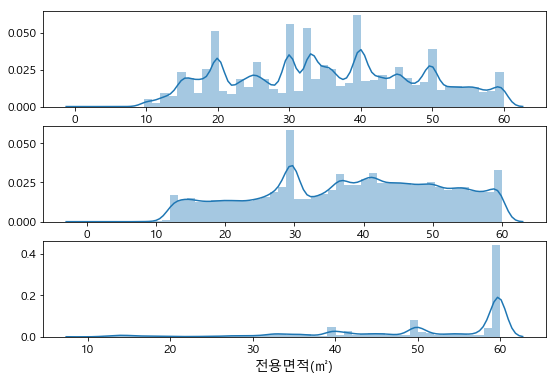

In [14]:
plt.rcParams['figure.figsize'] = 9,6
figure, ((ax1), (ax2), (ax3)) = plt.subplots(nrows=3, ncols=1)
sns.distplot(df1['계약면적(㎡)'], ax=ax1)
sns.distplot(df2['전용면적(㎡)'], ax=ax2)
sns.distplot(df3['전용면적(㎡)'], ax=ax3)

In [15]:
df1['계약면적(㎡)'].describe()

count    807289.000000
mean         35.295369
std          12.699120
min           1.450000
25%          25.000000
50%          35.000000
75%          45.000000
max          60.000000
Name: 계약면적(㎡), dtype: float64

In [16]:
print(df1.shape)
df1 = df1[df1['계약면적(㎡)']<=14]
print(df1.shape)

(807289, 11)
(21664, 11)


In [17]:
df1['type'] = '다가구'

In [18]:
df1.columns =['시군구', '번지', '도로조건', '면적', '전월세구분', '계약년월', '계약일', '보증금(만원)',
       '월세(만원)', '건축년도', '도로명', 'type']

In [19]:
print(df2.shape)
df2 = df2[df2['전용면적(㎡)']<=14]
print(df2.shape)

(501520, 14)
(16628, 14)


In [20]:
df2['type'] = '다세대'

In [21]:
df2.columns = ['시군구', '번지', '본번', '부번', '건물명', '전월세구분', '면적', '계약년월', '계약일',
       '보증금(만원)', '월세(만원)', '층', '건축년도', '도로명', 'type']

In [22]:
df2['면적'].value_counts()

12.0000    415
12.0900    356
12.2500    227
12.2400    215
12.0100    208
12.2100    204
12.6000    198
12.3000    195
12.4800    194
12.0300    188
12.0500    187
13.3200    181
12.1500    181
12.0700    180
12.0400    174
13.5000    170
12.1600    169
13.4400    162
12.5800    161
13.7700    159
12.1800    158
12.1700    156
12.8700    154
13.6000    154
12.0200    153
13.8600    150
12.3200    145
14.0000    144
13.3600    142
13.1200    140
          ... 
11.1000      1
8.6700       1
12.1670      1
12.1950      1
3.8300       1
10.1700      1
11.5900      1
11.2800      1
12.1690      1
13.3310      1
10.7500      1
9.3900       1
12.7916      1
10.8900      1
10.8700      1
12.0250      1
11.0700      1
10.9400      1
11.0400      1
8.6300       1
12.3390      1
8.6400       1
13.6420      1
11.9200      1
9.3000       1
12.2850      1
12.0620      1
10.5200      1
6.6700       1
9.6400       1
Name: 면적, Length: 423, dtype: int64

In [23]:
df = pd.concat([df1,df2])

C:\Users\hanbee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [24]:
df.tail()

,type,건물명,건축년도,계약년월,계약일,도로명,도로조건,면적,번지,보증금(만원),본번,부번,시군구,월세(만원),전월세구분,층
501253,다세대,씨티빌,2011.0,201204,1~10,중랑천로12길,NaN,13.05,130-137,"1,000",130,137,서울특별시 중랑구 상봉동,37,월세,5.0
501254,다세대,씨티빌,2011.0,201205,11~20,중랑천로12길,NaN,13.17,130-137,"6,000",130,137,서울특별시 중랑구 상봉동,0,전세,5.0
501255,다세대,씨티빌,2011.0,201208,11~20,중랑천로12길,NaN,13.05,130-137,300,130,137,서울특별시 중랑구 상봉동,45,월세,4.0
501371,다세대,Massin House,2011.0,201203,11~20,중랑역로3가길,NaN,12.15,320-109,500,320,109,서울특별시 중랑구 중화동,45,월세,3.0
501372,다세대,Massin House,2011.0,201203,21~31,중랑역로3가길,NaN,12.15,320-109,"5,000",320,109,서울특별시 중랑구 중화동,0,전세,3.0


In [25]:
df.head()

,type,건물명,건축년도,계약년월,계약일,도로명,도로조건,면적,번지,보증금(만원),본번,부번,시군구,월세(만원),전월세구분,층
265,다가구,NaN,2009.0,201701,21~31,논현로123길,8m미만,12.74,1**,"1,000",NaN,NaN,서울특별시 강남구 논현동,55,월세,NaN
266,다가구,NaN,2001.0,201703,11~20,언주로114길,8m미만,13.20,2**,"1,000",NaN,NaN,서울특별시 강남구 논현동,35,월세,NaN
267,다가구,NaN,1991.0,201706,1~10,학동로42길,8m미만,13.20,2**,"1,000",NaN,NaN,서울특별시 강남구 논현동,40,월세,NaN
1053,다가구,NaN,1996.0,201705,21~31,역삼로63길,12m미만,10.00,8**,500,NaN,NaN,서울특별시 강남구 대치동,55,월세,NaN
1054,다가구,NaN,1996.0,201706,21~30,선릉로72길,12m미만,11.34,9**,500,NaN,NaN,서울특별시 강남구 대치동,40,월세,NaN


In [26]:
df = df[df['계약년월']>201012]

In [27]:
df.columns

Index(['type', '건물명', '건축년도', '계약년월', '계약일', '도로명', '도로조건', '면적', '번지',
       '보증금(만원)', '본번', '부번', '시군구', '월세(만원)', '전월세구분', '층'],
      dtype='object')

In [28]:
df = df.sort_values('계약년월', ascending=True)

In [59]:
df.to_csv("C:\\Users\\hanbee\\Dropbox\\국토부 해커톤\\data\\notebook\\취약주거지_실거래가.csv")

In [29]:
ddf = df[['type','건축년도','도로명', '번지','시군구']]

In [30]:
ddf = ddf.drop_duplicates(keep='last')

In [31]:
ddf.head()

,type,건축년도,도로명,번지,시군구
611623,다가구,NaN,풍성로57길,3**,서울특별시 강동구 성내동
677856,다가구,1991.0,목동중앙남로16라길,6**,서울특별시 양천구 목동
637675,다가구,1991.0,경인로9길,1**,서울특별시 구로구 궁동
636701,다가구,1994.0,가마산로21길,4**,서울특별시 구로구 구로동
680578,다가구,1991.0,양산로25길,7*,서울특별시 영등포구 당산동3가


In [75]:
ddf.to_csv("C:\\Users\\hanbee\\Dropbox\\국토부 해커톤\\data\\notebook\\취약주거지_유니크.csv")

In [32]:
ddf[ddf['type']=='다세대'].tail()

,type,건축년도,도로명,번지,시군구
445198,다세대,2012.0,면목로95길,113-28,서울특별시 중랑구 상봉동
378962,다세대,2012.0,성내로9길,534-18,서울특별시 강동구 성내동
379118,다세대,2011.0,풍성로,420-17,서울특별시 강동구 성내동
379590,다세대,2013.0,성내로3길,537-13,서울특별시 강동구 성내동
380377,다세대,2011.0,상암로3길,503-5,서울특별시 강동구 암사동


In [33]:
ddf[ddf['type']=='다가구'].tail()

,type,건축년도,도로명,번지,시군구
716515,다가구,1995.0,관악로12길,1***,서울특별시 관악구 봉천동
750784,다가구,1990.0,회기로23다길,5*,서울특별시 동대문구 회기동
750490,다가구,1961.0,제기로21길,2**,서울특별시 동대문구 청량리동
749951,다가구,1985.0,경동시장로10가길,6**,서울특별시 동대문구 제기동
700771,다가구,1991.0,학동로42길,2**,서울특별시 강남구 논현동


In [34]:
ddf['도로명_건축년'] = ddf['도로명']+'_'+ddf['건축년도'].astype(str)

In [35]:
len(ddf['도로명_건축년'].unique())

13962

In [36]:
ddf['시군구_번지'] = ddf['시군구']+'_'+ddf['번지']
len(ddf['시군구_번지'].unique())

3290

In [99]:
pd.DataFrame(ddf['시군구'].value_counts()).to_csv("C:\\Users\\hanbee\\Dropbox\\국토부 해커톤\\data\\notebook\\시군구별_취약주택.csv",
                                              encoding='cp949')

## 취약가구 유니크값 및 전월세 실거래가 업데이트 완료
## 도로명주소의 센트로이드를 포인트로

# 새벽시간 노령 생활인구

In [38]:
pdf = pd.read_csv("C:\\Users\\hanbee\\Dropbox\\국토부 해커톤\\data\\생활인구\\time3_home_pop.csv",
                  encoding = 'cp949',engine = 'python')

In [39]:
pdf.head()

,TOT_REG_CD,ADM_NM,ADM_CD,geometry,시간대구분,집계구코드,총생활인구수,남자65세부터69세생활인구수,남자70세이상생활인구수,sum,seq
0,1101053010006,사직동,1101053,"POLYGON ((953231.9682865143 1953435.865716934,...",3,1101053010006,766.45,12.00,42.50,54.50,0
1,1101053010001,사직동,1101053,"POLYGON ((952858.5655841827 1952976.274114609,...",3,1101053010001,289.10,1.65,15.45,17.10,1
2,1101053010003,사직동,1101053,"POLYGON ((952889.1776866913 1953405.245515823,...",3,1101053010003,1269.45,22.90,52.55,75.45,2
3,1101053010002,사직동,1101053,"POLYGON ((953093.8012866974 1953337.962316513,...",3,1101053010002,1286.70,28.10,51.15,79.25,3
4,1101053010005,사직동,1101053,"POLYGON ((953553.9324855804 1953335.741514206,...",3,1101053010005,936.10,12.60,48.60,61.20,4


In [40]:
pdf = pd.DataFrame(pdf.groupby(['ADM_NM','ADM_CD'])['sum'].sum()).reset_index()

In [41]:
pdf.head()

,ADM_NM,ADM_CD,sum
0,가락1동,1124066,468.20
1,가락2동,1124067,1948.25
2,가락본동,1124065,2074.10
3,가리봉동,1117070,588.25
4,가산동,1118051,1474.80


In [42]:
pdf=pdf.set_index('ADM_CD')

In [43]:
odf = pd.read_excel("C:\\Users\\hanbee\\Dropbox\\국토부 해커톤\\data\\notebook\\독거노인_동코드조인.xlsx")
odf.head()

,H_SDNG_CD,H_DNG_CD,DO_NM,CT_NM,H_DNG_NM,합계_남성,수급_남성,저소득_남성,일반_남성,합계_계,수급_계,저소득_계,일반_계
0,1101053,11110530,서울,종로구,사직동,126,16,4,106,363,41,11,311
1,1101054,11110540,서울,종로구,삼청동,45,2,-,43,154,14,4,136
2,1101055,11110550,서울,종로구,부암동,109,10,8,91,315,35,17,263
3,1101056,11110560,서울,종로구,평창동,166,5,4,157,637,35,27,575
4,1101057,11110570,서울,종로구,무악동,60,8,3,49,231,41,18,172


In [44]:
odf.columns = ['ADM_CD', 'H_DNG_CD', 'DO_NM', 'CT_NM', 'H_DNG_NM', '합계_남성', '수급_남성',
       '저소득_남성', '일반_남성', '합계_계', '수급_계', '저소득_계', '일반_계']

In [45]:
odf = odf.set_index('ADM_CD')

In [46]:
odf = pd.concat([pdf,odf],axis=1)

In [47]:
odf.columns = ['ADM_NM', '03시_생활인구', 'H_DNG_CD', 'DO_NM', 'CT_NM', 'H_DNG_NM', '합계_남성',
       '수급_남성', '저소득_남성', '일반_남성', '합계_계', '수급_계', '저소득_계', '일반_계']

In [48]:
odf = odf[['H_DNG_CD','DO_NM', 'CT_NM','ADM_NM',
           '03시_생활인구',  
           '합계_계', '수급_계', '저소득_계', '일반_계',
           '합계_남성','수급_남성', '저소득_남성', '일반_남성']]

In [49]:
odf.head()

,H_DNG_CD,DO_NM,CT_NM,ADM_NM,03시_생활인구,합계_계,수급_계,저소득_계,일반_계,합계_남성,수급_남성,저소득_남성,일반_남성
ADM_CD,,,,,,,,,,,,,
1101053,11110530,서울,종로구,사직동,1576.75,363,41,11,311,126,16,4,106
1101054,11110540,서울,종로구,삼청동,345.30,154,14,4,136,45,2,-,43
1101055,11110550,서울,종로구,부암동,1110.75,315,35,17,263,109,10,8,91
1101056,11110560,서울,종로구,평창동,1884.50,637,35,27,575,166,5,4,157
1101057,11110570,서울,종로구,무악동,636.75,231,41,18,172,60,8,3,49


In [50]:
odf['독거노인비'] = odf['합계_계']/odf['03시_생활인구']

In [51]:
odf['독거노인비'].describe()

count    424.000000
mean       0.466052
std        0.175968
min        0.023494
25%        0.346887
50%        0.452838
75%        0.570240
max        1.191670
Name: 독거노인비, dtype: float64

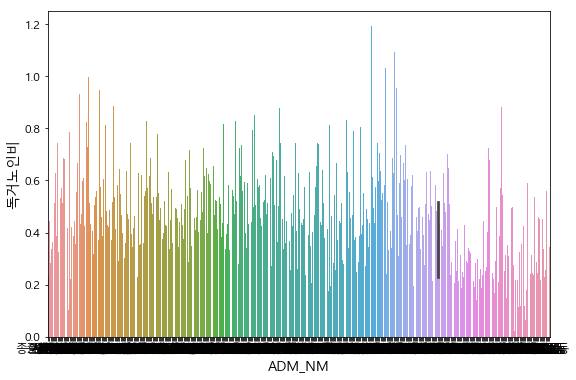

In [52]:
sns.barplot(data = odf,
           x='ADM_NM',
           y='독거노인비')

In [53]:
cdf = pd.read_excel("C:\\Users\\hanbee\\Dropbox\\국토부 해커톤\\data\\notebook\\주민등록인구_전체대노인.xlsx")
cdf.head()

,H_SDNG_CD,H_DNG_CD,DO_NM,CT_NM,H_DNG_NM,총인구(명),노인
0,1101053,11110530,서울,종로구,사직동,9379,1503
1,1101054,11110540,서울,종로구,삼청동,2808,572
2,1101055,11110550,서울,종로구,부암동,11012,1573
3,1101056,11110560,서울,종로구,평창동,18594,3032
4,1101057,11110570,서울,종로구,무악동,8106,1152


In [54]:
odf.head()

,H_DNG_CD,DO_NM,CT_NM,ADM_NM,03시_생활인구,합계_계,수급_계,저소득_계,일반_계,합계_남성,수급_남성,저소득_남성,일반_남성,독거노인비
ADM_CD,,,,,,,,,,,,,,
1101053,11110530,서울,종로구,사직동,1576.75,363,41,11,311,126,16,4,106,0.230220
1101054,11110540,서울,종로구,삼청동,345.30,154,14,4,136,45,2,-,43,0.445989
1101055,11110550,서울,종로구,부암동,1110.75,315,35,17,263,109,10,8,91,0.283592
1101056,11110560,서울,종로구,평창동,1884.50,637,35,27,575,166,5,4,157,0.338021
1101057,11110570,서울,종로구,무악동,636.75,231,41,18,172,60,8,3,49,0.362780


In [55]:
cdf.columns = ['ADM_CD', 'H_DNG_CD', 'DO_NM', 'CT_NM', 'ADM_NM', '총인구', '노령인구']

In [56]:
cdf = cdf.set_index('ADM_CD')
cdf.head()

,H_DNG_CD,DO_NM,CT_NM,ADM_NM,총인구,노령인구
ADM_CD,,,,,,
1101053,11110530,서울,종로구,사직동,9379,1503
1101054,11110540,서울,종로구,삼청동,2808,572
1101055,11110550,서울,종로구,부암동,11012,1573
1101056,11110560,서울,종로구,평창동,18594,3032
1101057,11110570,서울,종로구,무악동,8106,1152


In [57]:
odf.head()

,H_DNG_CD,DO_NM,CT_NM,ADM_NM,03시_생활인구,합계_계,수급_계,저소득_계,일반_계,합계_남성,수급_남성,저소득_남성,일반_남성,독거노인비
ADM_CD,,,,,,,,,,,,,,
1101053,11110530,서울,종로구,사직동,1576.75,363,41,11,311,126,16,4,106,0.230220
1101054,11110540,서울,종로구,삼청동,345.30,154,14,4,136,45,2,-,43,0.445989
1101055,11110550,서울,종로구,부암동,1110.75,315,35,17,263,109,10,8,91,0.283592
1101056,11110560,서울,종로구,평창동,1884.50,637,35,27,575,166,5,4,157,0.338021
1101057,11110570,서울,종로구,무악동,636.75,231,41,18,172,60,8,3,49,0.362780


In [58]:
odf = pd.concat([odf,cdf],axis=1)

In [59]:
odf.columns

Index(['H_DNG_CD', 'DO_NM', 'CT_NM', 'ADM_NM', '03시_생활인구', '합계_계', '수급_계',
       '저소득_계', '일반_계', '합계_남성', '수급_남성', '저소득_남성', '일반_남성', '독거노인비',
       'H_DNG_CD', 'DO_NM', 'CT_NM', 'ADM_NM', '총인구', '노령인구'],
      dtype='object')

In [60]:
odf = odf[['H_DNG_CD', 'DO_NM', 'CT_NM', 'ADM_NM', '03시_생활인구', '총인구', '노령인구',
           '합계_계', '합계_남성',
           '수급_계','수급_남성',
           '저소득_계', '저소득_남성',
           '일반_계','일반_남성',]]

In [174]:
odf.to_excel("C:\\Users\\hanbee\\Dropbox\\국토부 해커톤\\data\\notebook\\노인정보_통합.xlsx")

# 숙박업소

In [61]:
hdf = pd.read_csv("C:\\Users\\hanbee\\Dropbox\\국토부 해커톤\\data\\숙박업\\total.txt",engine='python',encoding='utf-8')
print(hdf.shape)
hdf.head()

(7638, 30)


,시군구코드,업종코드,년도,업소일련번호,업종명,신고일자,업소명,영업장면적(㎡),소재지전화번호,영업자시작일,...,의자수,욕실수,발한실,세탁기수,허가(신고)번호,비고,내외국인구분,국적,소재지도로명,소재지지번
0,3220000,201,1972,00003,숙박업(일반),19721117,대동여인숙,0.00,0234630462,19750523,...,NaN,NaN,Y,NaN,3220000-201-1972-00003,NaN,내국인,NaN,NaN,서울특별시 강남구 도곡동 956번지 11호
1,3220000,201,1974,00008,숙박업(일반),19741021,삼성여관,102.53,0205676817,19980114,...,11,11,Y,NaN,3220000-201-1974-00008,NaN,내국인,NaN,NaN,서울특별시 강남구 삼성동 115번지 28호
2,3220000,201,1975,00067,숙박업(일반),19751210,삼보여관,406.98,0205681188,19980703,...,0,0,Y,NaN,3220000-201-1975-00067,NaN,내국인,NaN,NaN,서울특별시 강남구 역삼동 779번지 5호
3,3220000,201,1976,00006,숙박업(일반),19760611,블랑호텔 강남점,183.19,NaN,20151120,...,23,23,Y,0,3220000-201-1976-00006,NaN,내국인,NaN,서울특별시 강남구 언주로94길 13 (역삼동),서울특별시 강남구 역삼동 700번지 27호
4,3220000,201,1976,00018,숙박업(일반),19761125,삼부,150.80,02 5432183,19950327,...,11,11,Y,NaN,3220000-201-1976-00018,NaN,내국인,NaN,NaN,서울특별시 강남구 논현동 4번지 0호


In [62]:
hdf = hdf.fillna(0)

In [63]:
hdf = hdf[['시군구코드',  '년도','업소명', '영업장면적(㎡)','행정동명', '폐업일자',
       '업태명', '객실수',  '소재지지번']]

In [64]:
hdf.head()

,시군구코드,년도,업소명,영업장면적(㎡),행정동명,폐업일자,업태명,객실수,소재지지번
0,3220000,1972,대동여인숙,0.00,도곡1동,20030222,여인숙업,13,서울특별시 강남구 도곡동 956번지 11호
1,3220000,1974,삼성여관,102.53,삼성2동,20041216,여관업,11,서울특별시 강남구 삼성동 115번지 28호
2,3220000,1975,삼보여관,406.98,역삼2동,20100126,여관업,20,서울특별시 강남구 역삼동 779번지 5호
3,3220000,1976,블랑호텔 강남점,183.19,역삼1동,0,여관업,23,서울특별시 강남구 역삼동 700번지 27호
4,3220000,1976,삼부,150.80,논현1동,19970201,여관업,11,서울특별시 강남구 논현동 4번지 0호


In [65]:
print(hdf.shape)

(7638, 9)


In [66]:
hdf = hdf[hdf['업태명'].str.contains("여")]
hdf = hdf[hdf['영업장면적(㎡)']!=0]
hdf = hdf[hdf['폐업일자']==0]

In [67]:
hdf['year']=pd.to_numeric(hdf["년도"],errors='coerce')
hdf['room']=pd.to_numeric(hdf["객실수"],errors='coerce')
hdf['area']=pd.to_numeric(hdf["영업장면적(㎡)"],errors='coerce')
hdf['room_area'] = (hdf['area']+1)/(hdf['room']+1)
hdf['old'] = 2019-hdf['year']

In [68]:
q =hdf.area.quantile(.75)

In [69]:
hdf2 = hdf[hdf['area']<=q]
hdf2 = hdf2[hdf2['old']>=30]
hdf2.shape

(1643, 14)

In [70]:
hdf2 = hdf2.dropna()

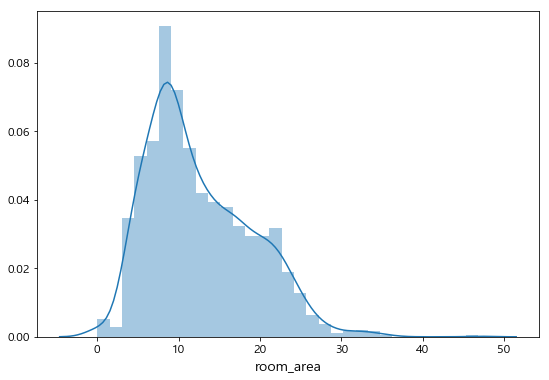

In [71]:
sns.distplot(hdf2['room_area'])

In [72]:
hdf2['room_area'].median()

11.083333333333334

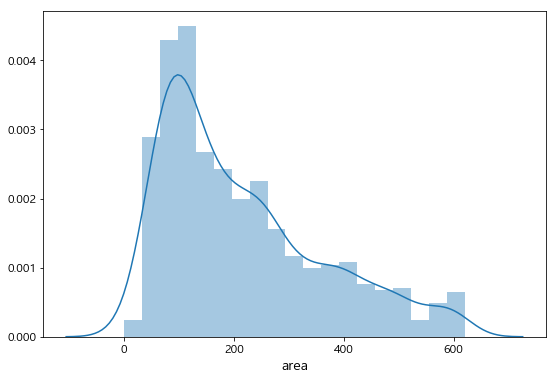

In [73]:
sns.distplot(hdf2['area'])

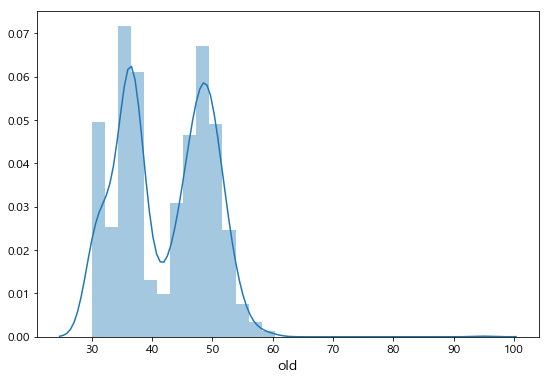

In [74]:
sns.distplot(hdf2['old'])

In [75]:
hdf2.old.mean()

42.043822276323795

In [76]:
hdf2.columns

Index(['시군구코드', '년도', '업소명', '영업장면적(㎡)', '행정동명', '폐업일자', '업태명', '객실수', '소재지지번',
       'year', 'room', 'area', 'room_area', 'old'],
      dtype='object')

In [77]:
#관악구 뭔가 모를 오류로 다시
gdf = pd.read_excel("C:\\Users\\hanbee\\Dropbox\\국토부 해커톤\\data\\숙박업\\관악.xlsx")
print(gdf.shape)
gdf.head()

(475, 29)


,시군구코드,업종코드,년도,업소일련번호,업종명,신고일자,업소명,영업장면적(㎡),소재지전화번호,영업자시작일,...,양실수,의자수,욕실수,발한실,세탁기수,허가(신고)번호,내외국인구분,국적,소재지도로명,소재지지번
0,3200000,201,1968,41,숙박업(일반),19680921,온천여관,65.15,208852537,19951024,...,0.0,0.0,10.0,Y,NaN,3200000-201-1968-00041,내국인,NaN,NaN,서울특별시 관악구 봉천동 14번지 0호
1,3200000,201,1968,310,숙박업(일반),19680916,동일,62.99,200000000,19951023,...,0.0,0.0,4.0,Y,NaN,3200000-201-1968-00310,내국인,NaN,NaN,서울특별시 관악구 봉천동 89번지 0호
2,3200000,201,1968,315,숙박업(일반),19681219,춘성,47.91,02 8834900,20040315,...,0.0,0.0,0.0,Y,0.0,3200000-201-1968-00315,내국인,NaN,서울특별시 관악구 청림1길 11 (봉천동),서울특별시 관악구 봉천동 9번지 0호
3,3200000,201,1968,355,숙박업(일반),19680430,동화,39.34,02 8891302,19970729,...,NaN,NaN,NaN,Y,NaN,3200000-201-1968-00355,내국인,NaN,NaN,서울특별시 관악구 신림동 354번지 0호
4,3200000,201,1969,49,숙박업(일반),19691229,고려,61.25,200000000,19970729,...,NaN,NaN,NaN,Y,NaN,3200000-201-1969-00049,내국인,NaN,NaN,서울특별시 관악구 신림동 395번지 12호


In [78]:
gdf = gdf.fillna(0)

gdf = gdf[['시군구코드',  '년도','업소명', '영업장면적(㎡)','행정동명', '폐업일자',
       '업태명', '객실수',  '소재지지번']]

gdf = gdf[gdf['업태명'].str.contains("여")]
gdf = gdf[gdf['영업장면적(㎡)']!=0]
gdf = gdf[gdf['폐업일자']==0]

gdf['year']=pd.to_numeric(gdf["년도"],errors='coerce')
gdf['room']=pd.to_numeric(gdf["객실수"],errors='coerce')
gdf['area']=pd.to_numeric(gdf["영업장면적(㎡)"],errors='coerce')
gdf['room_area'] = (gdf['area']+1)/(gdf['room']+1)
gdf['old'] = 2019-gdf['year']
gdf2 = gdf[gdf['area']<=q]
gdf2 = gdf2[gdf2['old']>=30]
gdf2 = gdf2.dropna()
print(gdf2.shape)
gdf2.head()

(63, 14)


,시군구코드,년도,업소명,영업장면적(㎡),행정동명,폐업일자,업태명,객실수,소재지지번,year,room,area,room_area,old
2,3200000,1968,춘성,47.91,청림동,0.0,여관업,12,서울특별시 관악구 봉천동 9번지 0호,1968,12,47.91,3.762308,51
23,3200000,1970,대성,100.30,청림동,0.0,여인숙업,10,서울특별시 관악구 봉천동 14번지 42호,1970,10,100.30,9.209091,49
25,3200000,1970,중앙,75.61,행운동,0.0,여인숙업,13,서울특별시 관악구 봉천동 62번지 1호,1970,13,75.61,5.472143,49
33,3200000,1970,삼화,40.97,삼성동,0.0,여인숙업,6,서울특별시 관악구 신림동 808번지 494호 1층,1970,6,40.97,5.995714,49
47,3200000,1971,공주,45.65,청림동,0.0,여인숙업,10,서울특별시 관악구 봉천동 7번지 290호,1971,10,45.65,4.240909,48


In [79]:
hdf2 =hdf2[hdf2['시군구코드']!='3200000']

In [80]:
fdf = pd.concat([hdf2,gdf2])

In [81]:
fdf.shape

(1643, 14)

In [82]:
fdf['업태명'].value_counts()

여관업     1346
여인숙업     297
Name: 업태명, dtype: int64

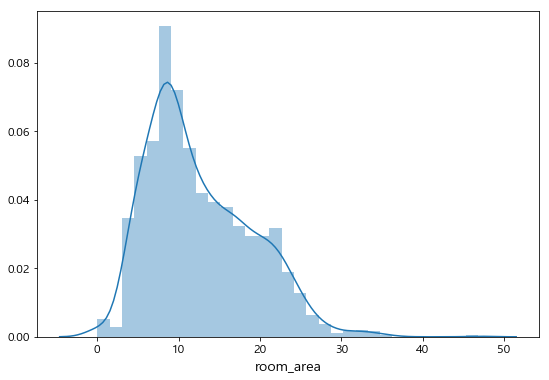

In [83]:
sns.distplot(fdf.room_area)

In [84]:
fdf2 = fdf[fdf['room_area']<=15]
fdf2.shape

(1115, 14)

In [85]:
fdf['행정동명'].value_counts()

종로1.2.3.4가동    51
상봉제2동          35
구로제2동          35
수유제1동          35
창신제1동          35
신림동            33
가리봉동           32
미아동            32
제기동            31
숭인제2동          31
종로5.6가동        28
남영동            28
용신동            27
대조동            26
화양동            26
시흥제1동          25
수유제3동          24
송천동            24
가산동            23
대흥동            21
구로제4동          20
답십리제1동         20
송중동            19
전농제1동          18
한강로동           18
번제1동           16
서교동            16
망우본동           16
쌍문제2동          15
청량리동           15
               ..
천호제3동           1
평창동             1
상도제4동           1
대학동             1
상도제1동           1
목2동             1
낙성대동            1
용답동             1
정릉제3동           1
성내제3동           1
방이2동            1
석촌동             1
창제2동            1
시흥제2동           1
시흥제3동           1
행당제1동           1
금호4가동           1
원효로제2동          1
신도림동            1
삼성1동            1
양재제1동           1
묵제1동            1
상계1동            1
약수동             1
홍제제2동     

In [454]:
fdf.to_csv("C:\\Users\\hanbee\\Dropbox\\국토부 해커톤\\data\\notebook\\소형숙박업소_30년이상.csv", encoding='cp949')